In [1]:
import sys
path_to_add = '../python_modules'
if path_to_add not in sys.path:
    sys.path.append(path_to_add)

In [2]:
import statistics
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt

In [3]:
import inferostatics
from dirichlet import param_shape, x_shape
import seeds

In [4]:
task = 'kse'
data_seeds_list = seeds.get_testdata_seeds(task)

x_test = []
param_test = []
regression_target_test = []
true_score_test = []

for data_seed in data_seeds_list:
    data = np.load(f'data/Trivariate_Dirichlet_{task}_seed={data_seed}.npz')
    x_test.append(data['x'])
    param_test.append(data['param'])
    regression_target_test.append(data['regression_target'])
    true_score_test.append(data['true_score'])

del(data)

mse_loss = keras.losses.MeanSquaredError(reduction='none')

test_losses_dict = dict()
test_errors_dict = dict()

**Training task: KSE**  
**Network type: Inferostatic Network**

In [5]:
training_task = 'kse'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    score_model = inferostatics_object.make_score_model()
    
    tmp = mse_loss(
        regression_target_test[0],
        score_model.predict([x_test[0], param_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    tmp = mse_loss(
        true_score_test[1],
        score_model.predict([x_test[1], param_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 854us/step
test_losses = [(15.51754, 0.008783255333581316), (15.506435, 0.00920967649253975), (15.522782, 0.009144047777147475), (15.51099, 0.00910253552434728), (15.515265, 0.008494146543697267)]
median=(15.515265, 0.008494146543697267)

test_errors = [(0.27881515, 0.009239481475788883), (0.2667466, 0.009461857773707838), (0.26706794, 0.009051391614636034), (0.29162005, 0.009702018897840085), (0.28532943, 0.009185133296655172)]
median=(0.27881515, 0.009239481475788883)


**Training task: KSE**  
**Network type: Direct Network**

In [6]:
training_task = 'kse'
network_type = 'direct'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    score_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    tmp = mse_loss(
        regression_target_test[0],
        score_model.predict([x_test[0], param_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    tmp = mse_loss(
        true_score_test[1],
        score_model.predict([x_test[1], param_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 877us/step
test_losses = [(15.550947, 0.008808036776321774), (15.547812, 0.009082126966936301), (15.518783, 0.009599626279958832), (15.517434, 0.009493680315774505), (15.540205, 0.009454191653357813)]
median=(15.540205, 0.009454191653357813)

test_errors = [(0.3429747, 0.0101656827148365), (0.35173708, 0.010500360739582455), (0.29883802, 0.009894086576751268), (0.27873415, 0.009527708149149572), (0.33691242, 0.010328697848353517)]
median=(0.33691242, 0.010328697848353517)


**Training task: KLRE**  
**Network type: Inferostatic Network**

In [7]:
training_task = 'klre'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    score_model = inferostatics_object.make_score_model()
    
    tmp = mse_loss(
        regression_target_test[0],
        score_model.predict([x_test[0], param_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    tmp = mse_loss(
        true_score_test[1],
        score_model.predict([x_test[1], param_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 1ms/step
test_losses = [(15.721699, 0.009332495762529895), (15.69482, 0.007748859110187678), (15.608665, 0.010056250505520531), (15.7646475, 0.007113450975821708), (15.63455, 0.009629239760988366)]
median=(15.69482, 0.007748859110187678)

test_errors = [(0.5371218, 0.010705129388538537), (0.50632375, 0.010684575319598492), (0.3887545, 0.009805724889211673), (0.59431076, 0.011040663895652475), (0.40289515, 0.009561674912919177)]
median=(0.50632375, 0.010684575319598492)


**Training task: KLRE**  
**Network type: Direct Network**

In [8]:
training_task = 'klre'
network_type = 'direct'
n_reps = 5

# EMPTY

**Training task: CARL**  
**Network type: Inferostatic Network**

In [9]:
training_task = 'carl'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    score_model = inferostatics_object.make_score_model()
    
    tmp = mse_loss(
        regression_target_test[0],
        score_model.predict([x_test[0], param_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    tmp = mse_loss(
        true_score_test[1],
        score_model.predict([x_test[1], param_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 854us/step
test_losses = [(15.598631, 0.009518592945074848), (15.57975, 0.010084664458867442), (15.593818, 0.010397475041183017), (15.568374, 0.010430635083003906), (15.622963, 0.009902269903883366)]
median=(15.593818, 0.010397475041183017)

test_errors = [(0.3851232, 0.01036175686144438), (0.36299306, 0.010295960770096393), (0.37611067, 0.010288450716515886), (0.3436971, 0.010540417123146233), (0.44652125, 0.011675201976627027)]
median=(0.37611067, 0.010288450716515886)


**Training task: CARL**  
**Network type: Direct Network**

In [10]:
training_task = 'carl'
network_type = 'direct'
n_reps = 5

# EMPTY

**Ideal**

In [11]:
tmp = mse_loss(
    regression_target_test[0],
    true_score_test[0],
).numpy()
print(np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5)

15.515320824700753 0.011400108526908329


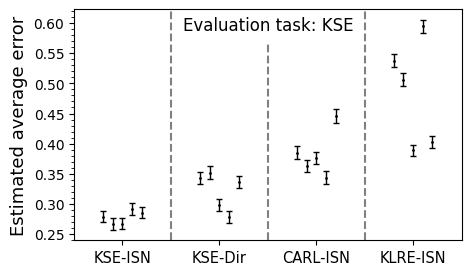

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))

x_labels = ['KSE-ISN', 'KSE-Dir', 'KLRE-ISN', 'CARL-ISN']
x_keys = [('kse', 'inferostatic'), ('kse', 'direct'), ('klre', 'inferostatic'), ('carl', 'inferostatic')]

sorted_idx = sorted(list(range(len(x_keys))), key=lambda i: statistics.median(test_errors_dict[x_keys[i]]))

x_labels = [x_labels[i] for i in sorted_idx]
x_keys = [x_keys[i] for i in sorted_idx]

for i in range(len(x_keys)):
    tmp = test_errors_dict[x_keys[i]]
    y = [_[0] for _ in tmp]
    yerr = [_[1] for _ in tmp]
    x = [i-0.2+0.1*j for j in range(len(y))]
    ax.errorbar(x, y, yerr, capsize=2, linewidth=0, elinewidth=1, fmt='.', markersize=2, color='black')

for i in range(len(x_keys)-1):
    ymax = 0.85
    if i in [0, len(x_keys)-2]:
        ymax = 1
    ax.axvline(x=i+0.5, linestyle='dashed', color='gray', ymax=ymax)

ax.set_xlim(-0.5, len(x_keys)-0.5)
ax.set_xticks(list(range(len(x_keys))))
ax.set_xticklabels(x_labels, fontsize=10.5)
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.set_ylabel('Estimated average error', fontsize=13)
ax.text(0.5, 0.93, "Evaluation task: KSE", ha='center', va='center', transform=ax.transAxes, fontsize=12)

fig.savefig('plots/kse_errors.pdf', bbox_inches='tight')

In [13]:
training_task = 'kse'
network_type = 'inferostatic'
n_reps = 5

tmp = test_losses_dict[(training_task, network_type)]
tmp = sorted(list(range(n_reps)), key=lambda i: tmp[i])
seed_idx = tmp[0]
print(f'{seed_idx = }')

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
network_seed = network_seeds_list[seed_idx]
potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                        param_shape=param_shape,
                                                        potential_model=potential_model,
                                                        expand_fn_args=False)
score_model = inferostatics_object.make_score_model()

true_score = true_score_test[1]
pred_score = score_model.predict([x_test[1], param_test[1]])

seed_idx = 1
3125/3125 [==============================] - 4s 1ms/step


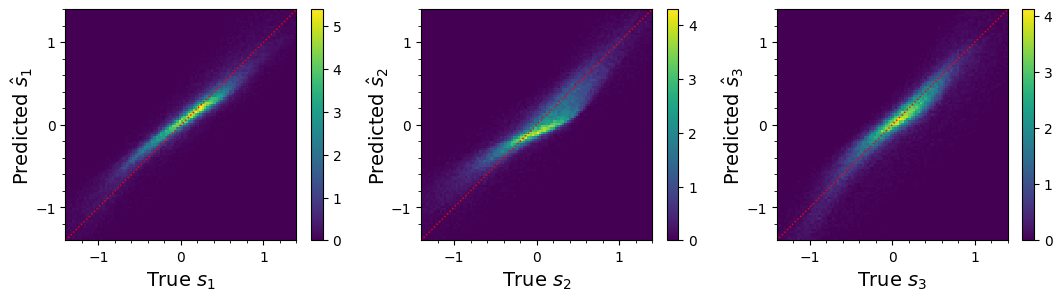

In [14]:
fig, axes = plt.subplots(figsize=(13, 3), ncols=3)

lim = 1.4
for i in range(3):
    axes[i].set_aspect('equal')
    _ = axes[i].hist2d(true_score[:,i], pred_score[:,i], bins=100, range=((-lim, lim), (-lim, lim)), density=True, rasterized=True)
    plt.colorbar(_[3], ax=axes[i])
    axes[i].set_xticks(list(range(-1, 2)))
    axes[i].set_yticks(list(range(-1, 2)))
    axes[i].minorticks_on()
    axes[i].set_xlabel(f'True $s_{i+1}$', fontsize=14)
    axes[i].set_ylabel(r'Predicted $\hat{s}_{' + f'{i+1}' + r'}$', labelpad=0, fontsize=14)
    
    axes[i].plot([-lim, lim], [-lim, lim], color='red', linestyle='dotted', linewidth=1)

fig.savefig('plots/score_truevspred.pdf', bbox_inches='tight')